## Домашнее задание 2

Дедлайн — ***6.09.18 12:00***. 

Выполненные задания можно присылать на почту zueva.nn@phystech.edu либо загружать в папку в своем репозитории.

В этом задании предлагается продолжить то, что мы начали делать на семинаре — принять участие в соревновании на платформе 'Kaggle'!

Мы будем работать с  уже знакомым нам соревнованием **House Prices: Advanced Regression Techniques**: 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Задачей является предсказание цены дома по большому набору фич. Вам необходимо обучиться на `train.csv` и отправить свои предсказания для данных, которые лежат в `test.csv`. Все данные находятся в папке **Seminars/Seminar2**. Там же можно найти `baseline solutions` — базовые и простые решения без особых надстроек.


### Часть 1

1. Если вы еще не зарегистрированы на платформе `Kaggle`, то это можно сделать здесь: www.kaggle.com.
   Регистрация нужна для того, чтобы Ваши посылки были привязаны к конкретному аккаунту. 
2. После регистрации на ресурсе нужно стать участником соревнования: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
3. После того, как вы зарегистрировались на участие в конкретном соревновании, вы готовы работать с данными. Обычно их можно скачать в разделе `Data`, но данные оттуда уже лежат в папке **Seminars/Seminar2**.

### Часть 2

Как только вы зарегистрировались и скачали данные, можно приступать к работе с ними.
1. Загрузите данные с помощью функций из пакета `Pandas` read_csv(). Обратите внимание на параметры — если у данных в первой строке стоят названия столбцов, то параметр **Header** нужно сделать истинным. Если данные вводятся через запятую, то параметру **sep** (separator) нужно передать символ `,`. Подробнее про параметры read_csv можно почитать здесь: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html. Как видите, их очень много и чтение файла можно настроить очень тонко

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, neighbors, dummy, preprocessing, svm
from sklearn import neural_network
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [2]:
#path = 'C:\\Users\\shepeleva-is\\Documents\\Sberbank_ML-master\\Students\\ShepelevaIS\\'
path = 'C:\\Users\\Irina\\Documents\\ShepelevaIS\\'

train = pd.read_csv(path + "train.csv", sep = ',', decimal = '.')
print("Train:", train.shape)

test = pd.read_csv(path + "test.csv", sep = ',', decimal = '.')
print("Test:",test.shape)

labels = train.SalePrice

Train: (1460, 81)
Test: (1459, 80)


C:\Users\Irina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Irina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


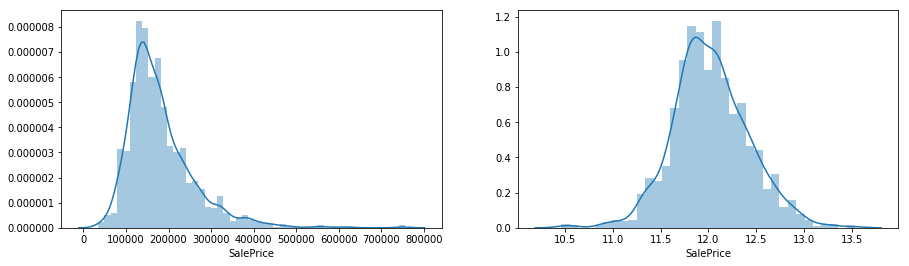

In [3]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

sns.distplot(labels, ax=ax1)
sns.distplot(np.log1p(labels), ax=ax2)
plt.show()

In [4]:
train.drop(["Id", "SalePrice"], axis=1, inplace=True) # исключаем id, потому что он не несет информации
test.drop(["Id"], axis=1, inplace=True)
all_data = pd.concat([train, test], axis=0)
print("All:", all_data.shape)

All: (2919, 79)


С какими типами признаков вы столкнулись?


Ответ: с точки зрения типов данных 'int64', 'O', 'float64'; по смыслу представлены 
- количественные признаки: непрерывные (continuous, например, BsmtUnfSF) и дискретные (discrete, например,  YearBuilt, Fireplaces);
- категориальные: упорядоченные (ordinal, например, OverallQual) и неупорядоченные (nominal, например, LotConfig);
- бинарные (например, CentralAir).

### Часть 3
Какие признаки выглядят бесполезными? Попробуйте выбросить некоторые фичи, опираясь на ваш личный жизненный опыт или алгоритмы `feature selection`. Подробнее про них можно прочитать здесь: http://scikit-learn.org/stable/modules/feature_selection.html

In [5]:
thres = 0.2 #исключаем признаки, у которых чаще чем в 20% случаев пропуски

condition = all_data.isnull().sum()/max(all_data.count())
condtinion_apply = condition[np.array(condition > thres)]
names = list(condtinion_apply.index)
print(names)
# drop ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
all_data.drop(names, axis=1, inplace=True)
#print(train.head(2))
print(all_data.shape)

(2919, 74)


In [7]:
ind_num = [x for x in all_data.columns if (all_data.dtypes[x]!='O')] 
ind_obj = [x for x in all_data.columns if all_data.dtypes[x]=='O'] #ищем текстовые параметры

In [8]:
for col in ind_num:
    all_data[col].fillna(all_data[col].mean(), inplace=True)
for col in ind_obj:    
    all_data[col].fillna(-1, inplace=True)
#print(all_data.isnull().sum())
print(all_data.shape)

(2919, 74)


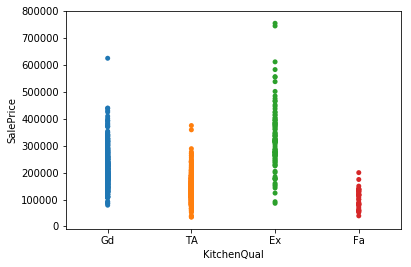

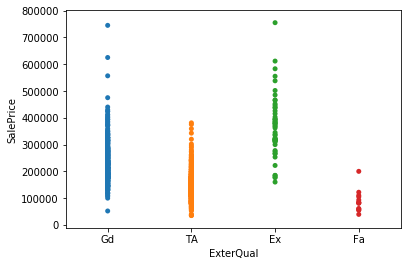

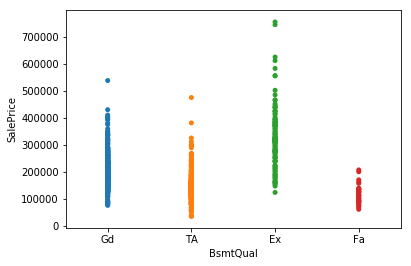

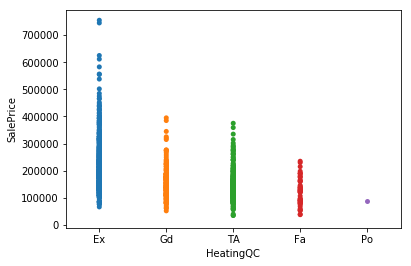

In [9]:
# Графический анализ указывает на значимость следующих категориальных переменных

sns.stripplot(train["KitchenQual"], labels)
plt.show()
sns.stripplot(train["ExterQual"], labels)
plt.show()
sns.stripplot(train["BsmtQual"], labels)
plt.show()
sns.stripplot(train["HeatingQC"], labels)
plt.show()


In [10]:
all_data["KitchenQual"] = all_data["KitchenQual"].replace('Fa', 1)
all_data["KitchenQual"] = all_data["KitchenQual"].replace('TA', 2)
all_data["KitchenQual"] = all_data["KitchenQual"].replace('Gd', 3)
all_data["KitchenQual"] = all_data["KitchenQual"].replace('Ex', 4)

all_data["ExterQual"] = all_data["ExterQual"].replace('Fa', 1)
all_data["ExterQual"] = all_data["ExterQual"].replace('TA', 2)
all_data["ExterQual"] = all_data["ExterQual"].replace('Gd', 3)
all_data["ExterQual"] = all_data["ExterQual"].replace('Ex', 4)

all_data["HeatingQC"] = all_data["HeatingQC"].replace('Po', 0)
all_data["HeatingQC"] = all_data["HeatingQC"].replace('Fa', 1)
all_data["HeatingQC"] = all_data["HeatingQC"].replace('TA', 2)
all_data["HeatingQC"] = all_data["HeatingQC"].replace('Gd', 3)
all_data["HeatingQC"] = all_data["HeatingQC"].replace('Ex', 4)

all_data["BsmtQual"] = all_data["BsmtQual"].replace('Po', 0)
all_data["BsmtQual"] = all_data["BsmtQual"].replace('Fa', 1)
all_data["BsmtQual"] = all_data["BsmtQual"].replace('TA', 2)
all_data["BsmtQual"] = all_data["BsmtQual"].replace('Gd', 3)
all_data["BsmtQual"] = all_data["BsmtQual"].replace('Ex', 4)

ind_obj = [x for x in all_data.columns if all_data.dtypes[x]=='O']

In [11]:
from copy import deepcopy

def cat_to_numbers(data, columns):
    """
    turn categorical features into numerical
    
    data: pd.csv dataset
    columns: list of cstegorical columns to process
    """
    numerical_data = deepcopy(data)
    for column in columns:
        numerical_column = []
        numerical_dict = {}
        for item in data[column]:
            if item not in numerical_dict:
                numerical_dict[item] = len(numerical_dict)
            numerical_column.append(numerical_dict[item])
        numerical_data[column] = numerical_column
    return numerical_data

In [12]:
all_data = cat_to_numbers(all_data, ind_obj)
print(all_data.shape)

(2919, 74)


#### Binarize

In [13]:
# List of categorial variables for binarization
ind_nom = ['MSSubClass', 'MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional',
'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition','BsmtFinType1','KitchenAbvGr', 'BsmtCond']


In [14]:
for col in ind_nom:
    dummies = pd.get_dummies(all_data[col]).rename(columns= lambda x: col + str(x))
   # print(dummies.columns)
    all_data = pd.concat([all_data, dummies], axis = 1)
    all_data.drop(col, axis=1, inplace=True)
    all_data.columns
    
print(all_data.shape)

(2919, 266)


In [15]:
#Y in logarithms
X_data = pd.DataFrame(all_data.iloc[:train.shape[0],:])
Y_data = pd.DataFrame(data = np.log(labels), columns = ['SalePrice'])

test_data = pd.DataFrame(all_data.iloc[train.shape[0]:])

In [67]:
# Выбросила несколько наиболее значимых фичей, чтобы увидеть значимость последующих. В итоге эти параметры остались в дата сете
#name_drop = np.array(['LotArea','OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtFinSF1',
#            'CentralAir', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
#            'Fireplaces', 'GarageArea', 'WoodDeckSF', 'MSZoning1', 'GarageType1','2ndFlrSF',  'MoSold',
#'OverallCond','LotFrontage','BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'OpenPorchSF'])
#X_data.drop(name_drop, axis=1, inplace=True) 

In [16]:
X, Y = np.array(X_data), np.log(labels)

print(X.shape)
print(Y.shape)

(1460, 266)
(1460,)


### Feature selection using random forest

Какие фичи кажутся вам самыми значимыми? Оцените значимость признаков, опираясь на описанный выше алгоритм, либо на ваш личный опыт, постройте для трех самых значимых графики. Как распределены данные? По какому закону?

In [17]:
rf = RandomForestRegressor(n_estimators=100, n_jobs = 3)
rf.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

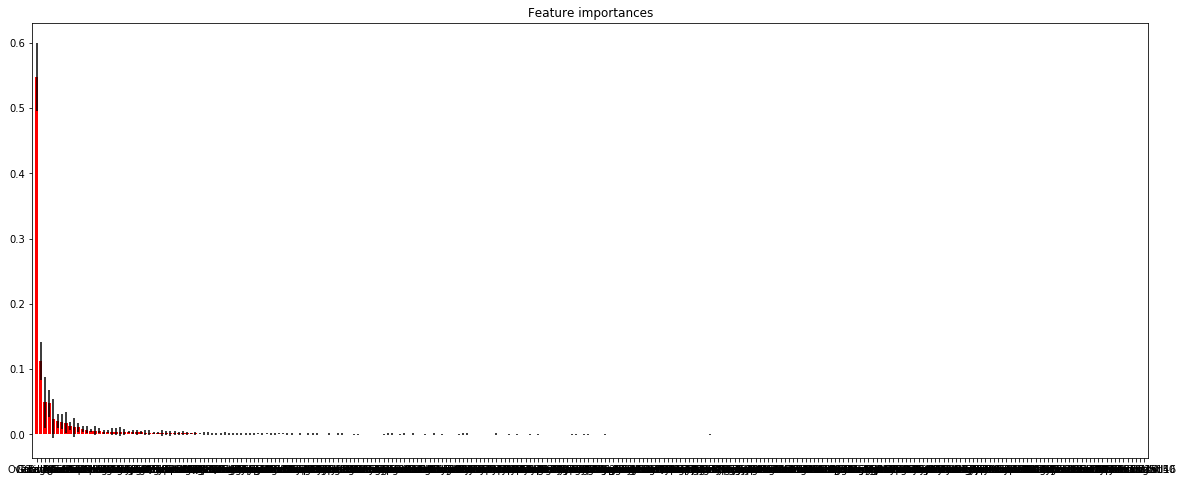

In [18]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X_data.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

In [19]:
Selector2 = SelectFromModel(rf, prefit=True)
ind_select2 = Selector2.get_support(indices = True).tolist()
names_select2 = X_data.columns[ind_select2]

X_data_new2 = pd.DataFrame(X_data[names_select2])
X_new2 = np.array(X_data_new2)

X_data_new2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF
0,65.0,8450,7,5,2003,2003,706.0,150.0,856.0,0,856,854,1710,0,2003.0,2.0,548.0,61
1,80.0,9600,6,8,1976,1976,978.0,284.0,1262.0,0,1262,0,1262,1,1976.0,2.0,460.0,0
2,68.0,11250,7,5,2001,2002,486.0,434.0,920.0,0,920,866,1786,1,2001.0,2.0,608.0,42
3,60.0,9550,7,5,1915,1970,216.0,540.0,756.0,0,961,756,1717,1,1998.0,3.0,642.0,35
4,84.0,14260,8,5,2000,2000,655.0,490.0,1145.0,0,1145,1053,2198,1,2000.0,3.0,836.0,84


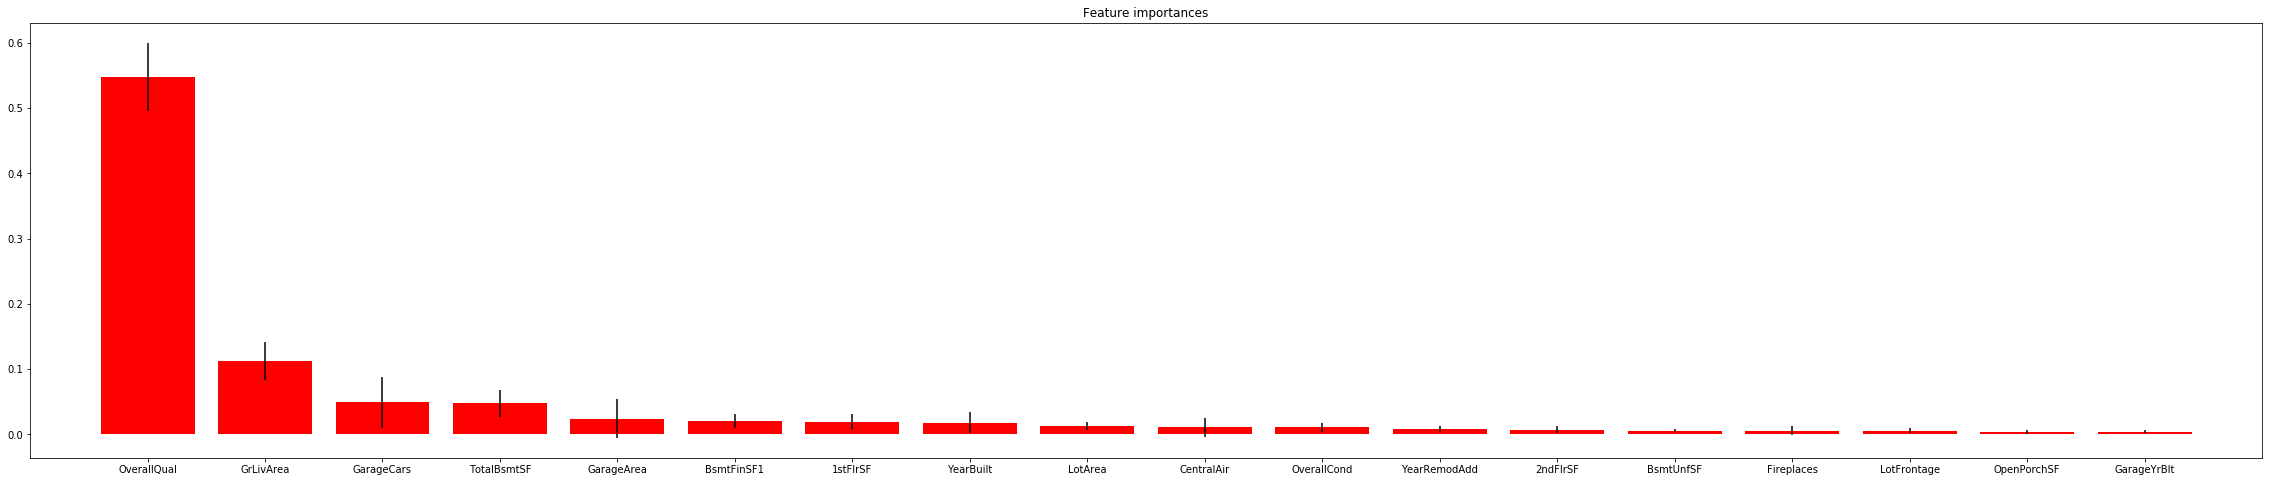

In [20]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
indices1 = indices[:len(ind_select2)]

plt.figure(figsize=(40, 8))
plt.title("Feature importances")
plt.bar(range(len(ind_select2)), importances[indices1],
       color="r", yerr=std[indices1], align="center")
plt.xticks(range(len(ind_select2)), X_data.columns[indices1])
plt.xlim([-1, len(ind_select2)])
plt.show()

In [21]:
#Previos submission1
#use_names =['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtFinSF1',
# 'CentralAir', '1stFlrSF', 'GrLivArea', 'Fireplaces', 'GarageArea',
# 'WoodDeckSF', 'GarageType1']

#Previos submission2
#Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtFinSF1',
#       'CentralAir', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
#       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'MSZoning1', 'GarageType1'],
#      dtype='object')

#Previos submission3
#use_names =['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtFinSF1',
#       'CentralAir', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
#       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'MSZoning1', 'GarageType1']

#Previos submission4
#use_names =['LotArea','OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtFinSF1',
#       'CentralAir', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
#     'Fireplaces', 'GarageArea', 'WoodDeckSF', 'MSZoning1', 'GarageType1','2ndFlrSF',  'MoSold']

# Расширенный список был подготовлен по следующему алгоритму:
# С помощью random forest по значимости отобраны самые важные параметры, модель запущена на них. Она дала определенную точность, 
#но не достаточную. После этого исключила из общего списка выбранные параметры и снова запустила random forest 
#и потом еще раз повторила процедуру.
use_names =['LotArea','OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtFinSF1', 'CentralAir', 
            '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 
            'MSZoning1', 'GarageType1','2ndFlrSF',  'MoSold', 'OverallCond','LotFrontage','BsmtUnfSF', 
            'TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'OpenPorchSF', 'MasVnrArea', 'ExterQual', 'ExterCond',
            'BsmtExposure', 'HeatingQC', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
           'GarageQual', 'GarageCond', 'EnclosedPorch', 'YrSold', 'MSSubClass30', 'MSSubClass60', 
            'MSZoning0', 'MSZoning2', 'LotShape0', 'LandContour0', 'Neighborhood2', 'Neighborhood10', 
            'RoofStyle1', 'Foundation0', 'GarageType0', 'GarageFinish1', 'BsmtFinType10']

# Try
#use_names =['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
#       'CentralAir', '1stFlrSF', 'GrLivArea', 'Fireplaces', 'GarageArea',
#       'MSZoning1', '2ndFlrSF', 'MoSold', 'OverallCond', 'LotFrontage',
#       'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'OpenPorchSF']
    

    
X_data_new2 = pd.DataFrame(X_data[use_names])
#X_data_new2["AfterRemod"] = np.array(X_data["YearRemodAdd"]) -  np.array(X_data["YearBuilt"])
#test_data["AfterRemod"] = np.array(test_data["YearRemodAdd"]) -  np.array(test_data["YearBuilt"])

test_data_new2 = pd.DataFrame(test_data[X_data_new2.columns])
test_new2 = np.array(test_data_new2)
test_new2.shape
X_data_new2.columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'Fireplaces', 'GarageArea',
       'MSZoning1', '2ndFlrSF', 'MoSold', 'OverallCond', 'LotFrontage',
       'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'OpenPorchSF'],
      dtype='object')

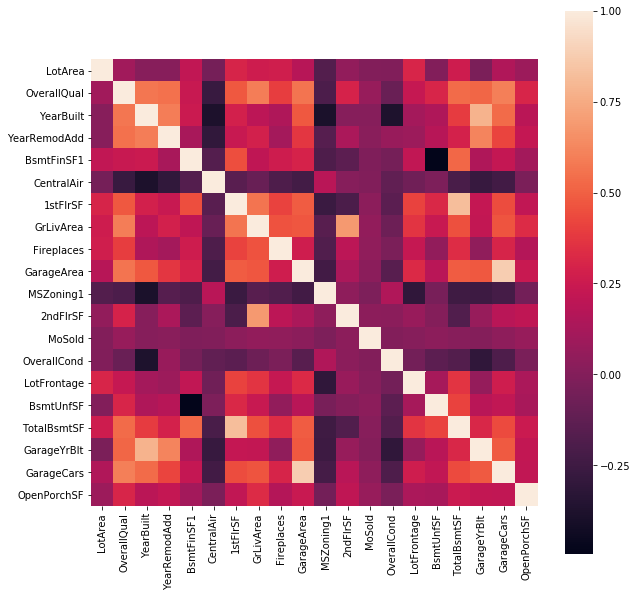

In [22]:
plt.subplots(figsize=(10,10))
sns.heatmap(X_data_new2.corr(), square=True)
plt.show()

In [23]:
# Попробовала выкинуть лишние фичи рекурсивной процедурой с помощью модели GradientBoostingRegressor. Результат не улучшился

from sklearn.feature_selection import RFE
#model = RandomForestRegressor(n_estimators=100, max_depth = 50, n_jobs=3)
model = sklearn.ensemble.GradientBoostingRegressor(n_estimators=800, learning_rate=0.05, max_depth=1, random_state=0)
rfe = RFE(model, 40)
fit = rfe.fit(np.array(X_data_new2), Y)
ind_new = fit.get_support(indices = True).tolist()
names_select3 = X_data_new2.columns[ind_new]
names_select3

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'Fireplaces', 'GarageArea',
       'MSZoning1', '2ndFlrSF', 'MoSold', 'OverallCond', 'LotFrontage',
       'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'OpenPorchSF'],
      dtype='object')

In [745]:
# Пробовала из упорядоченных фичей о качестве строить бинарные переменные. Качество это не улучшило.

#X_data_new2b = X_data_new2.copy()
#for col in ['OverallQual','BsmtQual']:
#    dummies = pd.get_dummies(X_data_new2b[col]).rename(columns= lambda x: col + str(x))
#   # print(dummies.columns)
#    X_data_new2b = pd.concat([X_data_new2b, dummies], axis = 1)
#    X_data_new2b.drop(col, axis=1, inplace=True)
#    X_data_new2b.columns
    
#print(X_data_new2b.shape)

#test_data_new2 = pd.DataFrame(test_data[X_data_new2.columns])
#test_new2 = np.array(test_data_new2)
#test_new2.shape
#X_data_new2.columns


(1460, 24)


### Графики некоторых переменных

C:\Users\Irina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


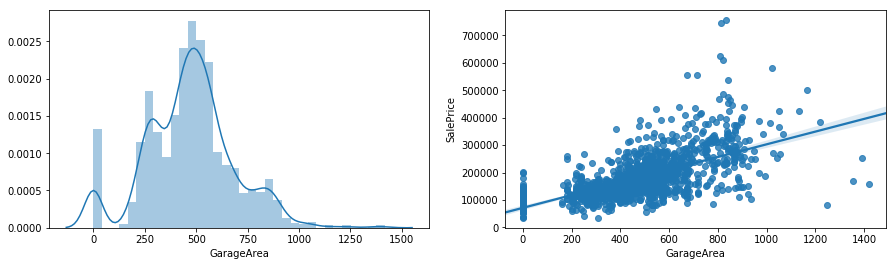

In [23]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

sns.distplot(X_data_new2["GarageArea"], ax=ax1)
sns.regplot(X_data_new2["GarageArea"], labels, ax=ax2) #fair
plt.show()

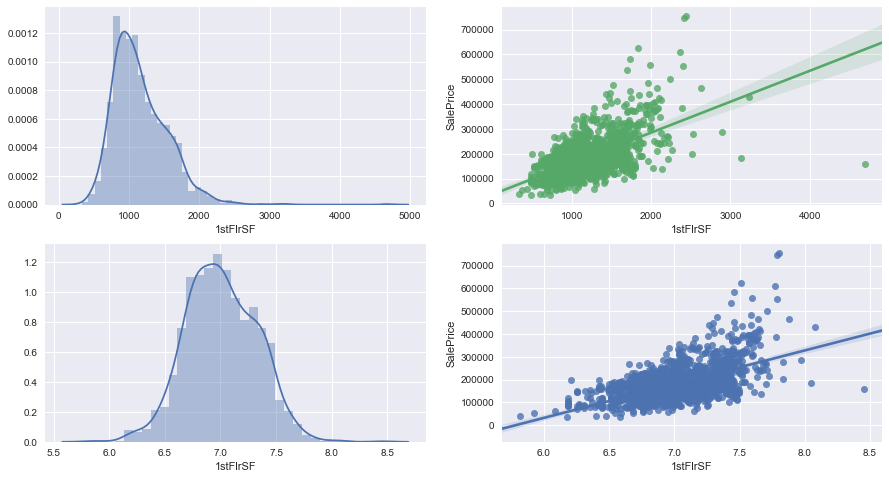

In [324]:
f, ax0 = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))

sns.distplot(np.log1p(X_data_new2["1stFlrSF"]), ax = ax0[1, 0])
sns.regplot(np.log1p(X_data_new2["1stFlrSF"]), labels, ax = ax0[1, 1]) #fair
sns.distplot(X_data_new2["1stFlrSF"], ax = ax0[0, 0])
sns.regplot(X_data_new2["1stFlrSF"], labels, ax = ax0[0, 1]) #fair
plt.show()

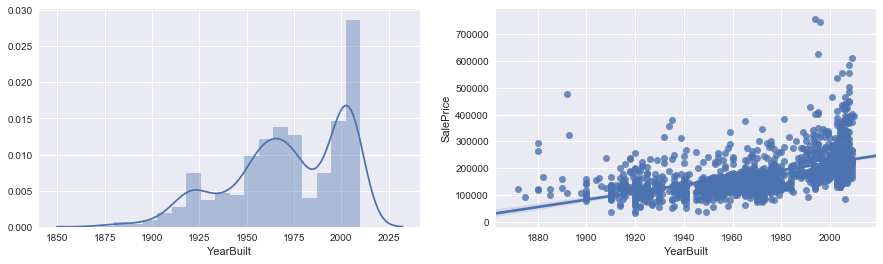

In [327]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

sns.distplot(X_data_new2["YearBuilt"], ax=ax1)
sns.regplot(X_data_new2["YearBuilt"], labels, ax=ax2) #fair
plt.show()

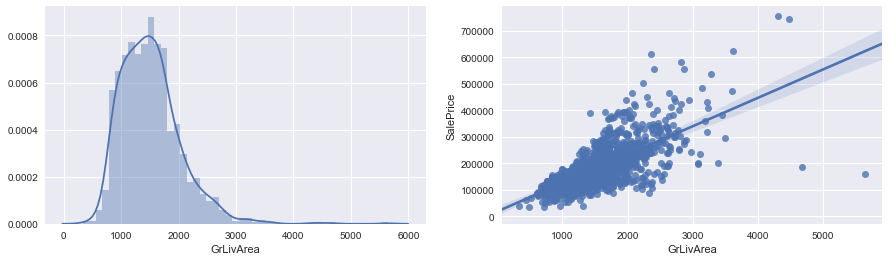

In [457]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

sns.distplot(X_data_new2["GrLivArea"], ax=ax1)
sns.regplot(X_data_new2["GrLivArea"], labels, ax=ax2) #fair
plt.show()

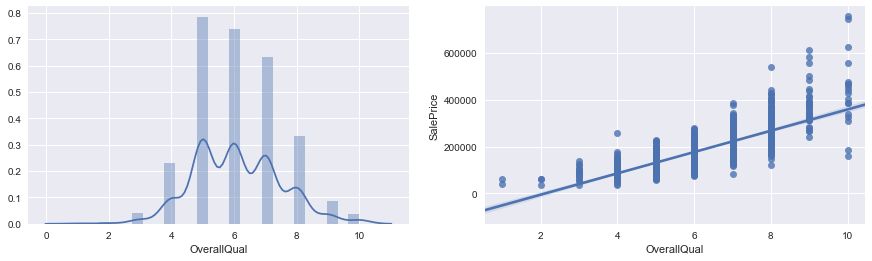

In [170]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

sns.distplot(X_data_new2["OverallQual"], ax=ax1)
sns.regplot(X_data_new2["OverallQual"], labels, ax=ax2) #fair
plt.show()

C:\Users\Irina\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


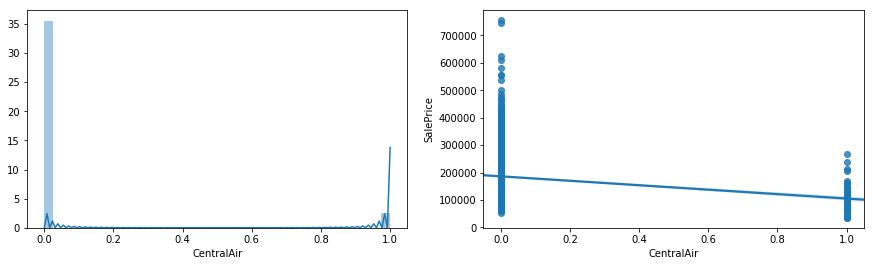

In [34]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

sns.distplot(X_data_new2["CentralAir"], ax=ax1)
sns.regplot(X_data_new2["CentralAir"], labels, ax=ax2) #fair
plt.show()

Попробуйте запустить обучение на разных алгоритмах (пример запуска в семинарах):
1. Линейная регрессия http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
2. Решающее дерево http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
3. Случайный лес http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
4. Градиентный бустинг http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

И любые другие модели, которые покажутся вам интересными :)

P.S.не забудьте использовать **cross_validation** и **K-Fold!**
Также можно распараллелить процесс обучения, если параметру *n_jobs* в регрессор передать значение *-1*.
С помощью  *cross_val_score* можно оценивать качество построенной модели.
Также у каждого регрессора есть множество *параметров*. Подробно про них можно прочитать в документации http://scikit-learn.org

Пример запуска модели можно найти в **Seminars/Seminar2**.

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X_data_new2), Y, test_size=0.15, random_state=35)

### Linear regression

In [30]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train,Y_train)

print(np.sqrt(sklearn.metrics.mean_squared_error(model.predict(X_test), Y_test)))

0.12697231052517122


In [31]:
print(np.sqrt(-cross_val_score(lr, np.array(X_data_new2), Y, scoring='neg_mean_squared_error')).mean())

0.159320913574764


### Lasso regression

In [28]:
lasso = linear_model.Lasso(alpha = 0.1)
model2 = lasso.fit(X_train,Y_train)

print(np.sqrt(sklearn.metrics.mean_squared_error(model2.predict(X_test), Y_test)))

0.1594511816953575


In [29]:
print(np.sqrt(-cross_val_score(lasso, np.array(X_data_new2), Y, scoring='neg_mean_squared_error')).mean())

0.1933993090853138


### Ridge regression

In [26]:
ridge = linear_model.Ridge (alpha = .5)
model3 = ridge.fit (X_train,Y_train) 


np.sqrt(sklearn.metrics.mean_squared_error(model3.predict(X_test), Y_test))

0.12695031235550583

In [30]:
print(np.sqrt(-cross_val_score(ridge, np.array(X_data_new2), Y, scoring='neg_mean_squared_error')).mean())

0.1485273881939598


### SVR

In [ ]:
# C ядром rbf получается высокая ошибка, в случае линейного и полинамильного слишком долго работает и не выдает результтат

#svr = sklearn.svm.SVR(C=1.0, epsilon=0.1, gamma='auto', kernel='rgb', max_iter=-1, shrinking=True, tol=0.001, verbose=1)
svr =  sklearn.svm.SVR(kernel='linear', C=10)
model4 = svr.fit(X_train, Y_train) 

np.sqrt(sklearn.metrics.mean_squared_error(model4.predict(X_test), Y_test))

In [37]:
print(np.sqrt(-cross_val_score(svr, np.array(X_data_new2), Y, scoring='neg_mean_squared_error')).mean())

0.3991877953840857


### Random forest

#### Select n_estimators

In [38]:
#'accuracy', 'average_precision', 'f1', 'precision', 'recall', 'roc_auc'

from sklearn.grid_search import GridSearchCV

rf = RandomForestRegressor()
params = {
    'n_estimators': [50, 100, 200, 300, 400, 500]
}
gsv = GridSearchCV(estimator=rf, param_grid=params, scoring='mean_squared_error', cv=3, verbose=1, n_jobs=3)

# splits data in 3 folds to validate
% time gsv.fit(np.array(X_data_new2), Y)

C:\Users\Irina\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Irina\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:   13.1s finished


Wall time: 18.3 s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'n_estimators': [50, 100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=1)

In [32]:
print(gsv.best_params_, np.sqrt(-gsv.best_score_))

{'n_estimators': 200} 0.1453006434305897


#### Select max_depth

In [34]:
from sklearn.grid_search import GridSearchCV

rf = RandomForestRegressor(n_estimators=400)
params = {
    'max_depth': [2, 5, 10, 50, 100]
}
gsv = GridSearchCV(estimator=rf, param_grid=params, scoring='mean_squared_error', cv=3, verbose=1, n_jobs=3)
# splits data in 3 folds to validate
% time gsv.fit(np.array(X_data_new2), Y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:   16.3s finished


Wall time: 22.2 s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'max_depth': [2, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=1)

In [35]:
print(gsv.best_params_, np.sqrt(-gsv.best_score_))

{'max_depth': 100} 0.14540273684940314


#### Run random forest with selected parameters

In [36]:
rf = RandomForestRegressor(n_estimators=200, max_depth = 50, n_jobs=3)
np.sqrt(-cross_val_score(rf, np.array(X_data_new2), Y, scoring='neg_mean_squared_error')).mean()

0.14493404596098594

### Simple neural network

In [59]:
nn = sklearn.neural_network.MLPRegressor()
params = {
    'hidden_layer_sizes': [(5,), (10,), (50,), (100,), (500,)]
}
gsv = GridSearchCV(estimator=nn, param_grid=params, scoring='mean_squared_error', cv=3, verbose=1, n_jobs=3)
% time gsv.fit(np.array(X_data_new2), Y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    7.3s finished


Wall time: 8.16 s


GridSearchCV(cv=3, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'hidden_layer_sizes': [(5,), (10,), (50,), (100,), (500,)]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=1)

In [60]:
print(gsv.best_params_, gsv.best_score_)

{'hidden_layer_sizes': (500,)} -234.4283804676185


In [61]:
nn = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(500,))
params = {
    'activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsv = GridSearchCV(estimator=nn, param_grid=params, scoring='mean_squared_error', cv=3, verbose=1, n_jobs=2)
% time gsv.fit(np.array(X_data_new2), Y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    4.2s finished


Wall time: 5.51 s


GridSearchCV(cv=3, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=1)

In [91]:
print(gsv.best_params_, gsv.best_score_)

{'activation': 'tanh'} -0.3606217143936584


In [104]:
nn = sklearn.neural_network.MLPRegressor(activation='tanh', hidden_layer_sizes=(100,))
nn
model6 = nn.fit(X_test, Y_test)

In [105]:
#sklearn.metrics.mean_absolute_error(model6.predict(X_test), Y_test)
np.sqrt(sklearn.metrics.mean_squared_error(model6.predict(X_test), Y_test))

0.6665048882402957

### Boosting

In [50]:
from sklearn.grid_search import GridSearchCV

gb0 = sklearn.ensemble.GradientBoostingRegressor(n_estimators=800)
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]
}
gsv = GridSearchCV(estimator=gb0, param_grid=params, scoring='mean_squared_error', cv=3, verbose=1, n_jobs=3)
# splits data in 3 folds to validate
% time gsv.fit(np.array(X_data_new2), Y)

print(gsv.best_params_, gsv.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:    9.8s finished


Wall time: 11.9 s


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=800, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=1)

In [52]:
from sklearn.grid_search import GridSearchCV

gb0 = sklearn.ensemble.GradientBoostingRegressor(n_estimators=800, learning_rate=0.05)
params = {
    'max_depth': [3, 5, 7, 9]
}
gsv = GridSearchCV(estimator=gb0, param_grid=params, scoring='mean_squared_error', cv=3, verbose=1, n_jobs=3)
# splits data in 3 folds to validate
% time gsv.fit(np.array(X_data_new2), Y)

print(gsv.best_params_, gsv.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:   16.1s finished


Wall time: 18.2 s
{'max_depth': 3} -0.016442522436719537


In [54]:
#слишком большое значение n_estimators приводит к переобучению
gb = sklearn.ensemble.GradientBoostingRegressor(n_estimators=800, learning_rate=0.05, max_depth=3, random_state=0)
model7 = gb.fit(X_train, Y_train)

np.sqrt(sklearn.metrics.mean_squared_error(model7.predict(X_test), Y_test))

0.12603306625982946

In [38]:
np.sqrt(-cross_val_score(gb, np.array(X_data_new2), Y, scoring='neg_mean_squared_error')).mean()

0.12963633360534735

## Final models

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X_data_new2), Y, test_size=0.15, random_state=35)

lr = linear_model.LinearRegression()
model1 = lr.fit (X_train,Y_train)

#lasso = linear_model.Lasso(alpha = 0.1)
#model2 = lasso.fit(X_train,Y_train)

rf = RandomForestRegressor(n_estimators=100, max_depth = 50, n_jobs=3)
model5 = rf.fit(X_train, Y_train)

gb = sklearn.ensemble.GradientBoostingRegressor(n_estimators=800, learning_rate=1, max_depth=1, random_state=0)#GradientBoostingClassifier() AdaBoostClassifier(n_estimators = 100)
model7 = gb.fit(X_train, Y_train)

#nn = sklearn.neural_network.MLPRegressor(activation='tanh', hidden_layer_sizes=(100,))
#model6 = nn.fit(X_test, Y_test)

np.sqrt(sklearn.metrics.mean_squared_error((model1.predict(X_test) + model5.predict(X_test) 
                                            + model7.predict(X_test))/3, 
                                           Y_test))
#0.11896786753074802

0.2396987105004548

### Submission

In [40]:
#Check shapes before submissions
len(set.intersection(set(test_data_new2.columns), set(X_data_new2.columns)))-len(X_data_new2.columns)

0

In [41]:
test_final = np.array(test_data_new2)

In [42]:
preds = np.exp((model1.predict(test_final) + model5.predict(test_final) + model7.predict(test_final))/3)

In [43]:
#функция для формирования файла для отправки в соревнование
def submit(preds):
    submission = pd.read_csv(path + "sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv(path + "submission.csv", index=False)

submit(preds)

### Часть 4
После того, как вы сформировали файл `submission.csv`, он появится в той же директории, где находится основной Jupyter Notebook. Далее его необходимо отправить в систему. Для этого нужно нажать на `Submit Predictions`.
Далее вы нажиматее `Upload Submission File` и отправляете туда `submission.csv` (сам код отправлять в этом соревновании не нужно!). После того, как Вы нажали `Submit`, Kaggle перенаправит вас на *Leader board*, где вы сможете увидеть свой *score* и место среди всех участников.
Будьте внимательны, нельзя делать больше 10 посылок в день!

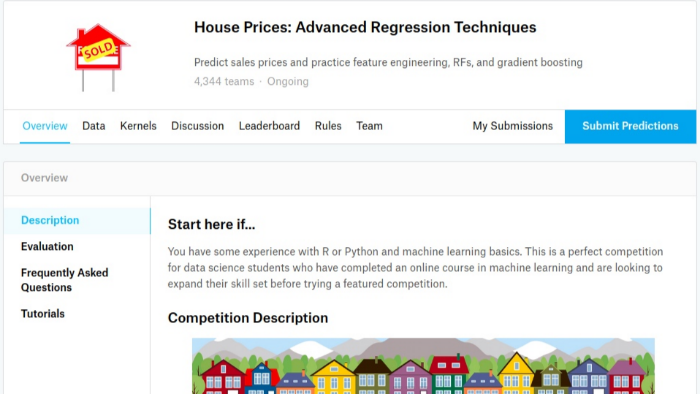

In [45]:
from IPython.display import Image
Image(path + "1.png")

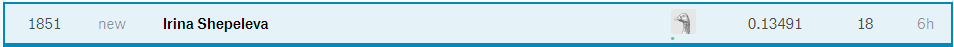

In [46]:
from IPython.display import Image
Image(path + "3.png")

Идеи, как можно улучшить результат:
* Найти какие категориальные признаки являются ординальными и закодировать их соответственно
* Найти наиболее важные категориальные признаки и попробовать их закодировать разными способами
* Потюнить регрессор
* Сгенерировать новые признаки

### Часть 4
Опишите полученные результаты, какого скора Вы смогли добиться, какое место заняли? Какой алгоритм оказался лучше других? Можете ли Вы объяснить, почему так вышло?

Ответ: Получен скор 0,13491 и место 1851. Лучше остальных сработал ансамбль из линейной регрессии, случайного леса и встроенного в sklearn градиентного бустинга с равным весом. Ансамбль показал себя лучше, чем отдельная модель, поскольку подходы совершают разные ошибки и в итоге ошибки были скомпенсированы. Из моделей ансамбля лучше всего прогнозирует бустинг. Вероятно, связано с большим значением параметра n_estimators. 